In [ ]:
# This generates an instrument response matrix based on input data with 
# illumination from different pairs of <lenslet,lambda>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [2]:
# 2D detector dims
x_size = 100
y_size = 200

# number of basis set commands
# (equivalently, illuminations for every <lenslet,lambda> pair)
M_basis_set_cmds = 10

In [3]:
N_pixels = x_size*y_size
detector_2D_basis = np.zeros((x_size,y_size)) # initialize the plane of the detector

In [4]:
# make list of detector responses to illuminations
# this will serve as the basis set

detector_2D_basis_0 = np.copy(detector_2D_basis)
detector_2D_basis_1 = np.copy(detector_2D_basis)
detector_2D_basis_2 = np.copy(detector_2D_basis)
detector_2D_basis_3 = np.copy(detector_2D_basis)
detector_2D_basis_4 = np.copy(detector_2D_basis)
detector_2D_basis_5 = np.copy(detector_2D_basis)
detector_2D_basis_6 = np.copy(detector_2D_basis)
detector_2D_basis_7 = np.copy(detector_2D_basis)
detector_2D_basis_8 = np.copy(detector_2D_basis)
detector_2D_basis_9 = np.copy(detector_2D_basis)

detector_2D_basis_0[40:60,50:60] = 1.2
detector_2D_basis_1[40:60,60:70] = 1.2
detector_2D_basis_2[40:60,70:80] = 1.2
detector_2D_basis_3[40:60,80:90] = 1.2
detector_2D_basis_4[40:60,90:100] = 1.2
detector_2D_basis_5[40:60,100:110] = 1.2
detector_2D_basis_6[40:60,110:120] = 1.2
detector_2D_basis_7[40:60,120:130] = 1.2
detector_2D_basis_8[40:60,130:140] = 1.2
detector_2D_basis_9[40:60,140:150] = 1.2

In [5]:
# make list of basis set commands

M_zeros = np.zeros((M_basis_set_cmds,1)) # initialize a blank command vector

M_basis_set_cmds_0 = np.copy(M_zeros)
M_basis_set_cmds_1 = np.copy(M_zeros)
M_basis_set_cmds_2 = np.copy(M_zeros)
M_basis_set_cmds_3 = np.copy(M_zeros)
M_basis_set_cmds_4 = np.copy(M_zeros)
M_basis_set_cmds_5 = np.copy(M_zeros)
M_basis_set_cmds_6 = np.copy(M_zeros)
M_basis_set_cmds_7 = np.copy(M_zeros)
M_basis_set_cmds_8 = np.copy(M_zeros)
M_basis_set_cmds_9 = np.copy(M_zeros)

M_basis_set_cmds_0[0] = 1
M_basis_set_cmds_1[1] = 1
M_basis_set_cmds_2[2] = 1
M_basis_set_cmds_3[3] = 1
M_basis_set_cmds_4[4] = 1
M_basis_set_cmds_5[5] = 1
M_basis_set_cmds_6[6] = 1
M_basis_set_cmds_7[7] = 1
M_basis_set_cmds_8[8] = 1
M_basis_set_cmds_9[9] = 1

In [6]:
# put responses into list so as to access them in a loop
detector_response_basis = (detector_2D_basis_0,detector_2D_basis_1,detector_2D_basis_2,detector_2D_basis_3,
                          detector_2D_basis_4,detector_2D_basis_5,detector_2D_basis_6,detector_2D_basis_7,
                          detector_2D_basis_8,detector_2D_basis_9)

# initialize another list to receive flattened, 1D detector responses
detector_response_basis_flat = list()

# initialize poke matrix
poke_matrix = np.zeros((N_pixels,M_basis_set_cmds))

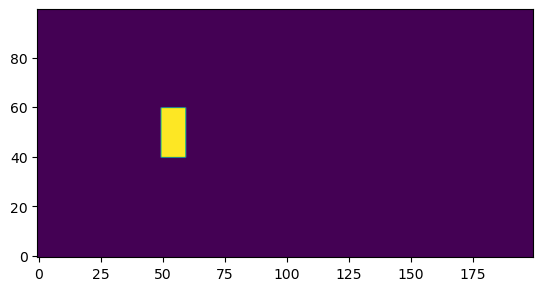

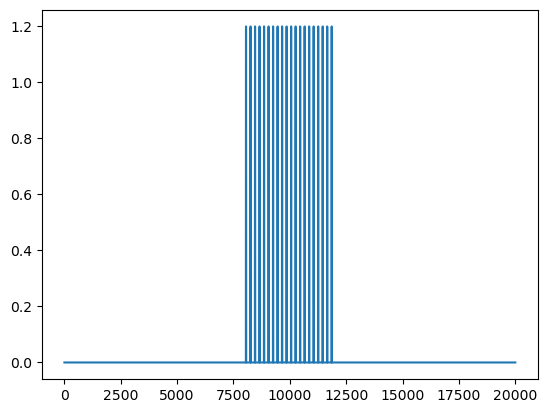

----


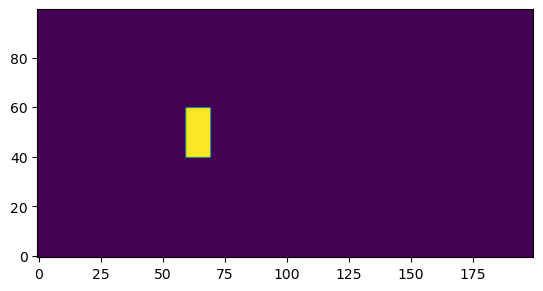

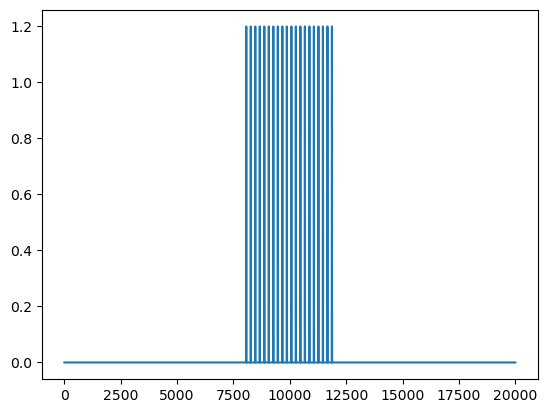

----


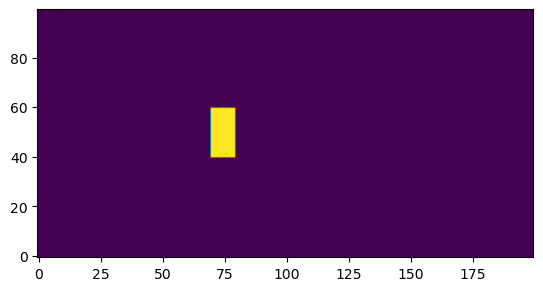

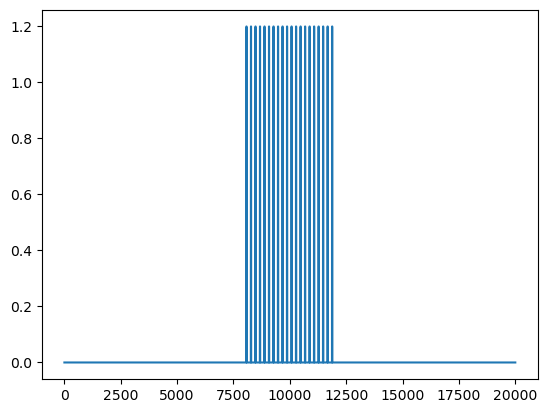

----


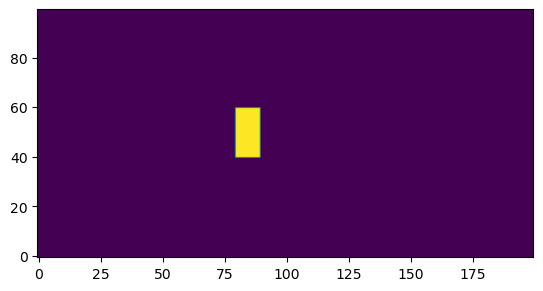

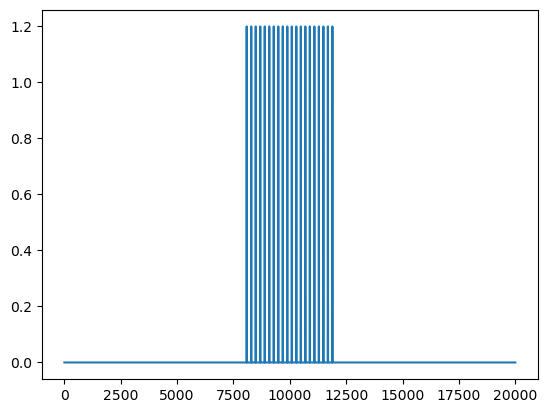

----


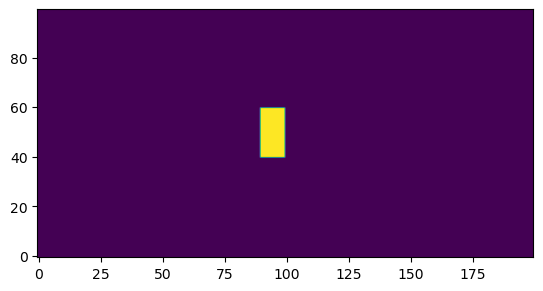

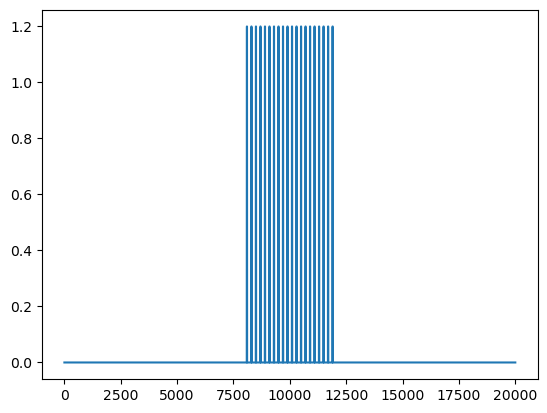

----


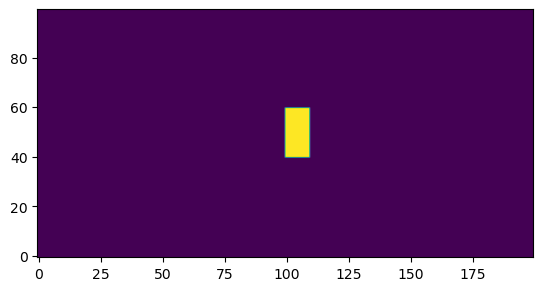

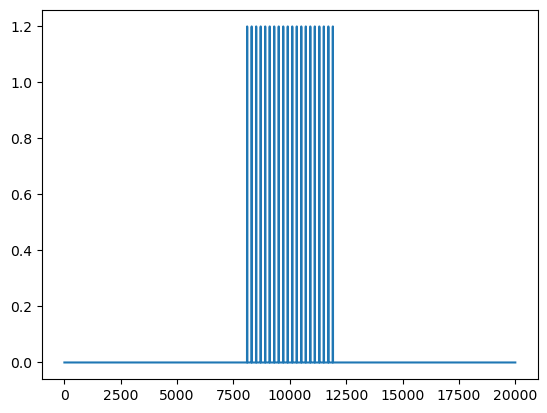

----


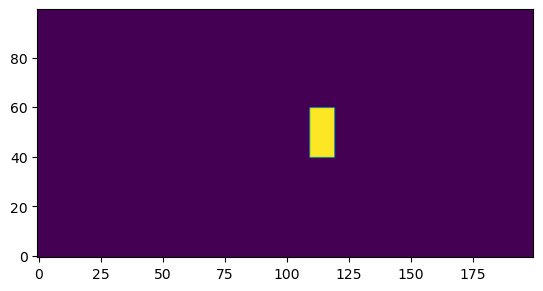

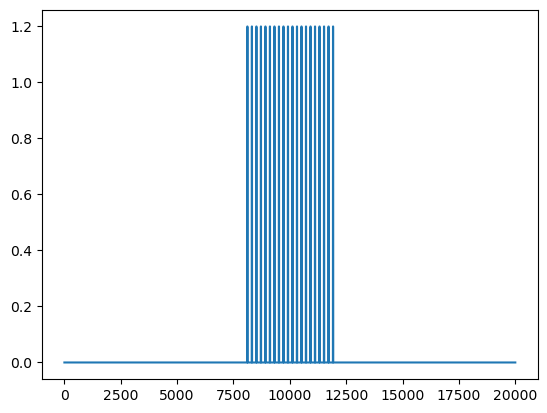

----


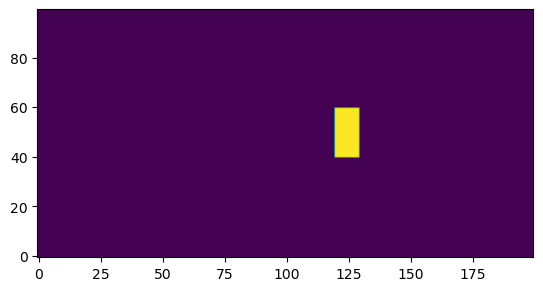

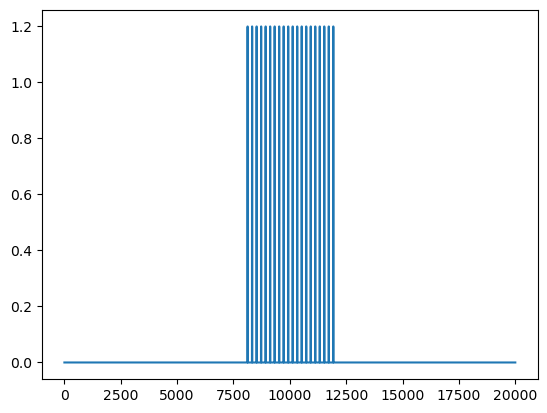

----


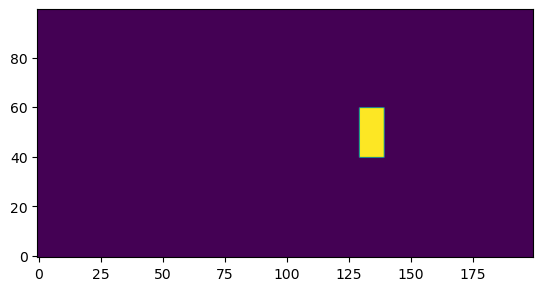

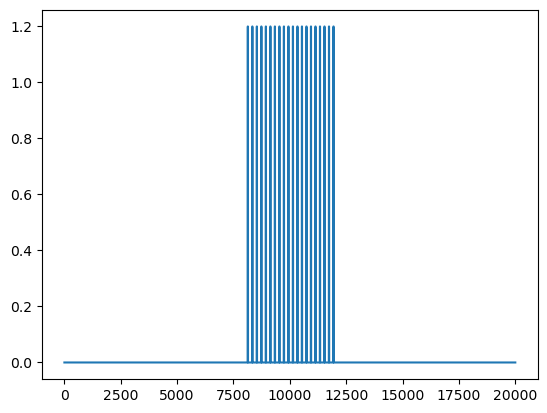

----


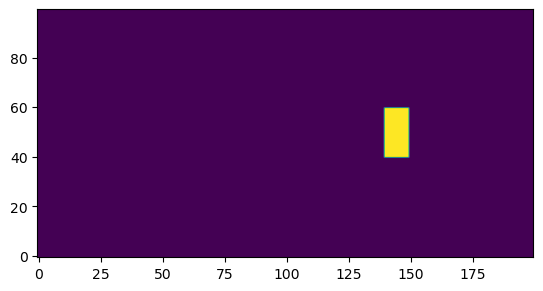

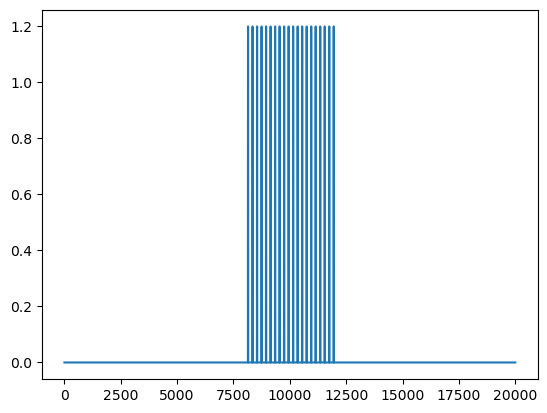

----


In [7]:
# show each 2D array, and put flattened 2D arrays into the 'poke' matrix
for i in range(0,M_basis_set_cmds):
    
    #plt.imshow(detector_response_basis[i], origin="lower")
    #plt.show()
    
    # accumulate flattened responses
    flattened = detector_response_basis[i].flatten()
    detector_response_basis_flat.append(flattened)
    
    poke_matrix[:,i] = flattened
    
    plt.plot(flattened)
    plt.show()
    
    print("----")

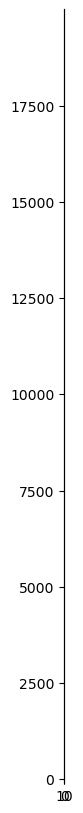

In [8]:
#np.max(poke_matrix)

fig, ax = plt.subplots(nrows=1, figsize=(16,10))

ax.imshow(poke_matrix, origin="lower")
ax.set_xlim(0,10)
plt.show()

In [9]:
# SVD decompose the poke matrix 

#u, s, vh = np.linalg.svd(poke_matrix, full_matrices=True)

In [10]:
# pseudoinverse

response_matrix = np.linalg.pinv(poke_matrix)

In [11]:
#print(np.shape(poke_matrix))
print(np.shape(response_matrix))
print(np.shape(M_basis_set_cmds_0))
print(np.shape(detector_response_basis[0]))

(10, 20000)
(10, 1)
(100, 200)


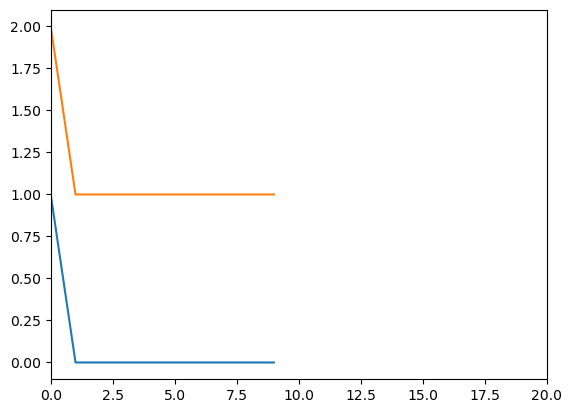

In [13]:
# test: science signal S equals (approx) pseudoinverse(P) [response matrix] * V [pixel responses]

S = np.matmul(response_matrix,poke_matrix[:,0]) # col of poke matrix here is same as detector_response_basis_flat[0]

# how do the calculated and true values compare?

plt.clf()
# plot the calculated science signal
plt.plot(S)
# plot the real science signal
plt.plot(np.add(M_basis_set_cmds_0,1))
plt.xlim([0,20])
plt.show()